In [ ]:
!pip install tensorflow keras opencv-python-headless matplotlib scikit-learn

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sinhadhossainfahim","key":"ea2928cdeb741c32e28cc5d08a3128ba"}'}

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bmadushanirodrigo/fracture-multi-region-x-ray-data
!unzip fracture-multi-region-x-ray-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated3 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def alexnet(input_shape=(227, 227, 3), num_classes=2):
    input_layer = Input(shape=input_shape)

    # 1st Convolutional Layer
    x = Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # 2nd Convolutional Layer
    x = Conv2D(filters=256, kernel_size=(5, 5), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # 3rd Convolutional Layer
    x = Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding='same')(x)

    # 4th Convolutional Layer
    x = Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding='same')(x)

    # 5th Convolutional Layer
    x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Flattening the layers
    x = Flatten()(x)

    # 1st Dense Layer
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)

    # 2nd Dense Layer
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output Layer
    output_layer = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=input_layer, outputs=output_layer)
    return model


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train',
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val',
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)


Found 9246 images belonging to 2 classes.
Found 829 images belonging to 2 classes.


In [ ]:
train_steps_per_epoch = train_generator.samples // train_generator.batch_size
valid_steps_per_epoch = valid_generator.samples // valid_generator.batch_size


In [ ]:
# Create the AlexNet model
model = alexnet(input_shape=(227, 227, 3), num_classes=2)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_steps_per_epoch
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.5837 - loss: 0.7806

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


288/288 ━━━━━━━━━━━━━━━━━━━━ 163s 488ms/step - accuracy: 0.5839 - loss: 0.7801 - val_accuracy: 0.5913 - val_loss: 0.7138
Epoch 2/20
  1/288 ━━━━━━━━━━━━━━━━━━━━ 24s 84ms/step - accuracy: 0.8125 - loss: 0.5416

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8125 - loss: 0.5416 - val_accuracy: 0.6897 - val_loss: 0.6140
Epoch 3/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 180s 468ms/step - accuracy: 0.7687 - loss: 0.4842 - val_accuracy: 0.8487 - val_loss: 0.3794
Epoch 4/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.3957 - val_accuracy: 0.7241 - val_loss: 0.4212
Epoch 5/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 140s 462ms/step - accuracy: 0.8214 - loss: 0.3872 - val_accuracy: 0.8512 - val_loss: 0.3323
Epoch 6/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.9375 - loss: 0.1824 - val_accuracy: 0.8621 - val_loss: 0.2783
Epoch 7/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 140s 456ms/step - accuracy: 0.8834 - loss: 0.2837 - val_accuracy: 0.8450 - val_loss: 0.3562
Epoch 8/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9062 - loss: 0.2294 - val_accuracy: 0.8966 - val_loss: 0.2000
Epoch 9/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 131s 446ms/step - accuracy: 0.9049 - loss: 0.2354 - val_accu

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predictions for confusion matrix and classification report
predictions = model.predict(valid_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = valid_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Report
print(classification_report(true_labels, predicted_classes, target_names=valid_generator.class_indices.keys()))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test',
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to maintain order of labels
)


Found 506 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step - accuracy: 0.8139 - loss: 0.3759
Test Loss: 0.24273966252803802
Test Accuracy: 0.8972331881523132
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 282ms/step


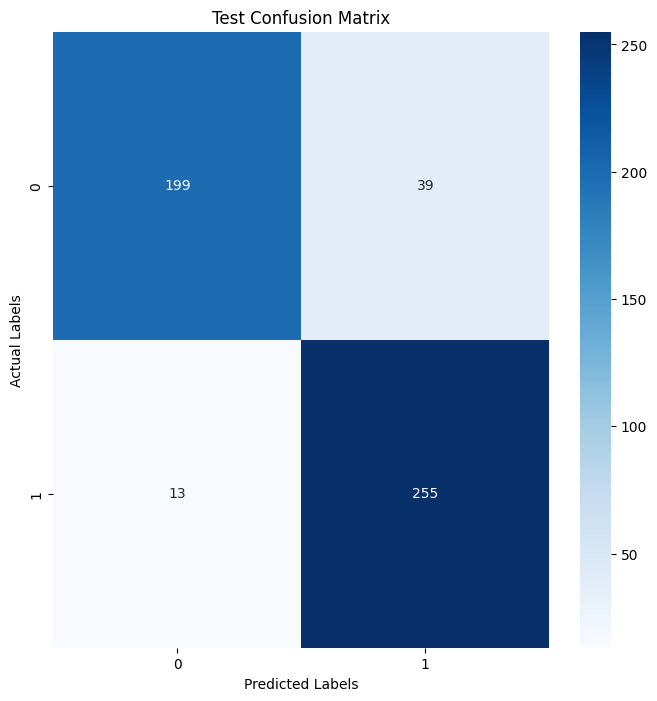

               precision    recall  f1-score   support

    fractured       0.94      0.84      0.88       238
not fractured       0.87      0.95      0.91       268

     accuracy                           0.90       506
    macro avg       0.90      0.89      0.90       506
 weighted avg       0.90      0.90      0.90       506



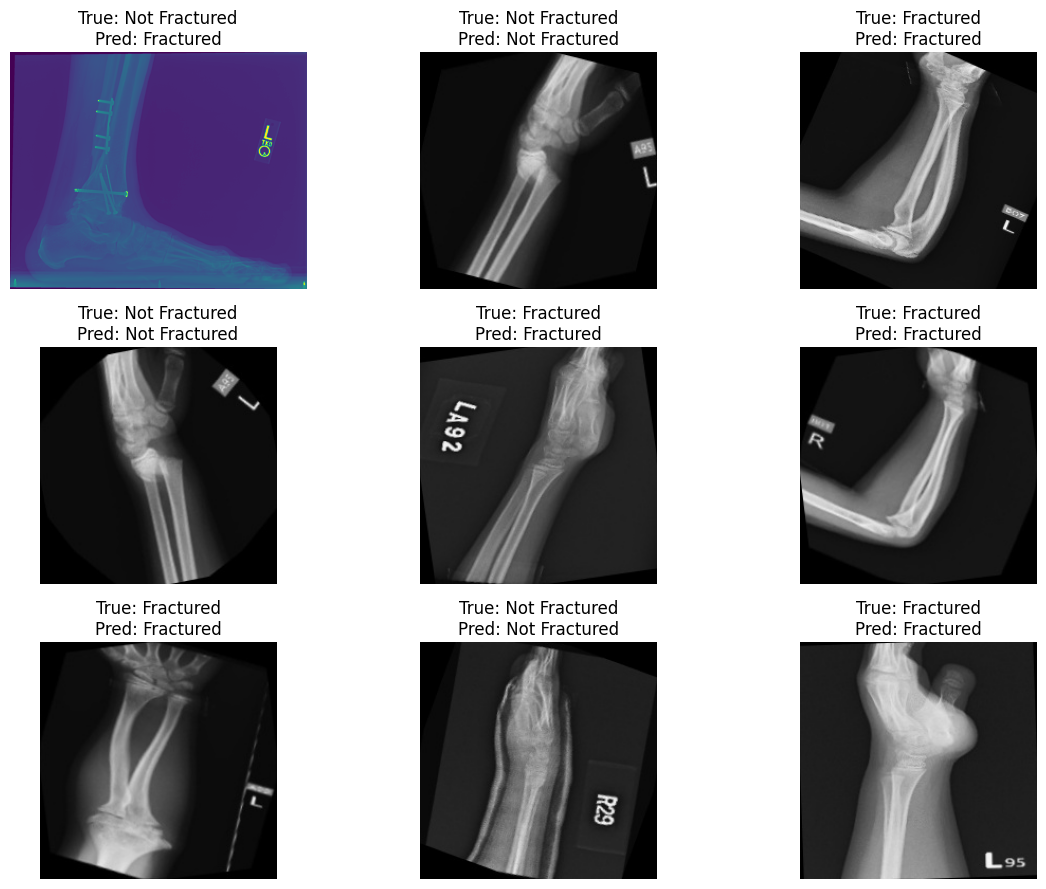

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predictions for confusion matrix and classification report
test_predictions = model.predict(test_generator)
predicted_test_classes = np.argmax(test_predictions, axis=1)
true_test_labels = test_generator.classes

# Confusion Matrix for Test Data
test_cm = confusion_matrix(true_test_labels, predicted_test_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(test_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Test Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Report for Test Data
print(classification_report(true_test_labels, predicted_test_classes, target_names=test_generator.class_indices.keys()))

# Visualize some predictions
import random

plt.figure(figsize=(12, 9))
for i in range(9):
    idx = random.randint(0, len(test_generator.filenames) - 1)
    img_path = test_generator.filepaths[idx]
    img = plt.imread(img_path)

    pred_class = "Fractured" if predicted_test_classes[idx] == 1 else "Not Fractured"
    true_class = "Fractured" if true_test_labels[idx] == 1 else "Not Fractured"

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_class}\nPred: {pred_class}")
    plt.axis('off')
plt.tight_layout()
plt.show()
